In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm


def train_test_split(X, y, train_fraction=.7, seed=42, replace=False):
    """Splits up X, y to training and testing data
    Parameters
    ----------
    X : array-like
        Length must be same as y
    y : array-like
        Length must be same as X
    train_fraction : float, optional
        Fraction for training data set
    seed : int, optional
        Random seed for reproducibility
    replace: bool, optional
        True for sampling with replacement
    Returns
    -------
    (X_train, X_test, y_train, y_test)
    """

    if len(X) != len(y):
        raise ValueError("Lengths of X and y not equal!")

    # split 70% training and 30% test
    train_fraction = int(len(X) * train_fraction)

    X_train = X.sample(n=train_fraction, random_state=seed, replace=replace)
    X_test = X.drop(X_train.index)
    y_train = y[X_train.index]
    y_test = y[X_test.index]

    return X_train, X_test, y_train, y_test

# code from
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
def plot_svm_margins(clf, X, y):
    """
    =========================================
    SVM: Maximum margin separating hyperplane
    =========================================
    Plot the maximum margin separating hyperplane within a two-class
    separable dataset using a Support Vector Machine classifier with
    linear kernel.
    """
    # fit the model, don't regularize for illustration purposes
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )
    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )

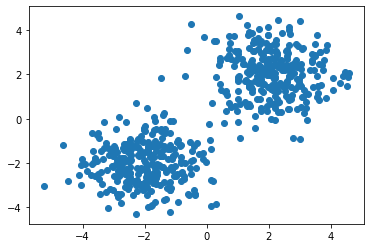

In [3]:

from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

blobs = make_blobs([300, 300], 2, centers = [(-2,-2), (2,2)], random_state=42)[0]
plt.scatter(blobs[:,0], blobs[:,1])

# Clustering
 - K-means algorithm
 - unsupervised learning algorithm

In [4]:
from sklearn.cluster import KMeans

kmean = KMeans(2)
kmean.fit(blobs)
blobs = np.c_[blobs, kmean.predict(blobs)]
blobs

array([[-1.77590752, -1.9874076 ,  1.        ],
       [ 1.9803622 ,  2.55248995,  0.        ],
       [-2.81822068,  0.09238728,  1.        ],
       ...,
       [ 4.40341559,  1.9423812 ,  0.        ],
       [ 0.65181458,  2.74326409,  0.        ],
       [ 1.07676675,  0.64831539,  0.        ]])

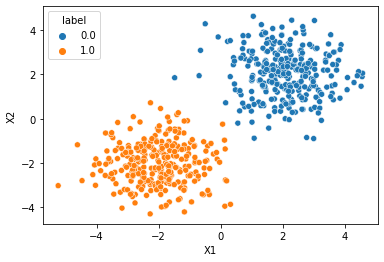

In [5]:
df_blobs = pd.DataFrame(blobs, columns = ["X1", "X2", "label"])
sns.scatterplot(data = df_blobs, x = "X1", y = "X2", hue = "label");

In [6]:
X, y = df_blobs.drop("label", axis = 1).to_numpy(), df_blobs["label"].to_numpy()
X

array([[-1.77590752, -1.9874076 ],
       [ 1.9803622 ,  2.55248995],
       [-2.81822068,  0.09238728],
       ...,
       [ 4.40341559,  1.9423812 ],
       [ 0.65181458,  2.74326409],
       [ 1.07676675,  0.64831539]])

# SVM - Support vector machine

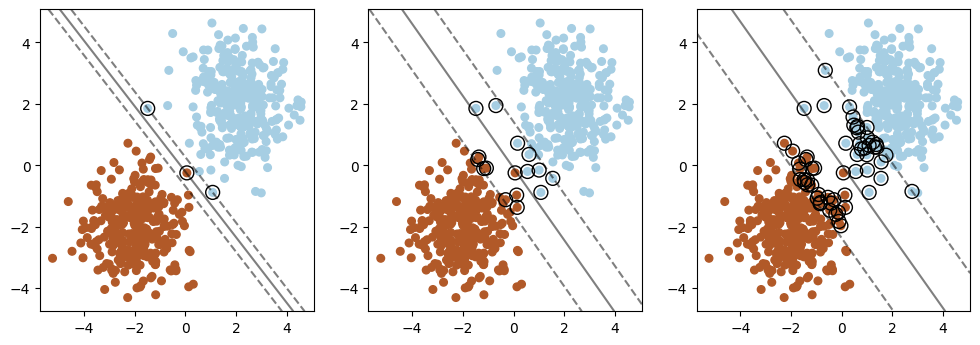

In [7]:
fig, ax = plt.subplots(1,3, dpi = 100, figsize = (12,4))

for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel = "linear", C = C)
    plot_svm_margins(classifier, X, y)

# Radial basis kernel

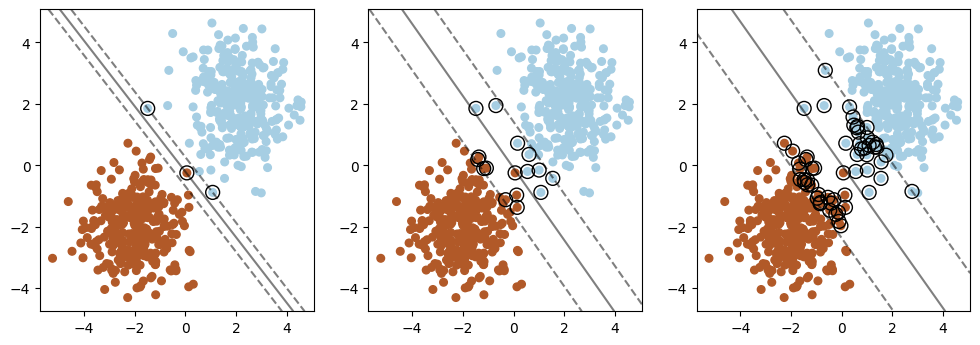

In [8]:
fig, ax = plt.subplots(1,3, dpi = 100, figsize = (12,4))

for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel = "linear", C = C)
    plot_svm_margins(classifier, X, y)

# Polynomial kernel

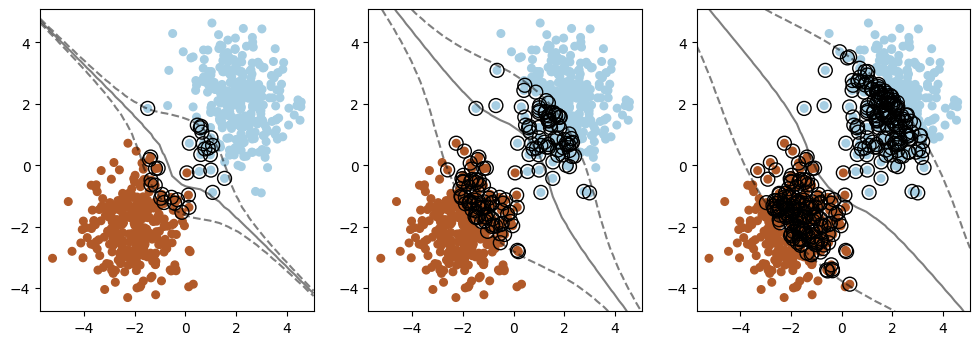

In [9]:
fig, ax = plt.subplots(1,3, dpi = 100, figsize = (12,4))

for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel = "poly", C = C, degree = 3)
    plot_svm_margins(classifier, X, y)

# Sigmoid kernel

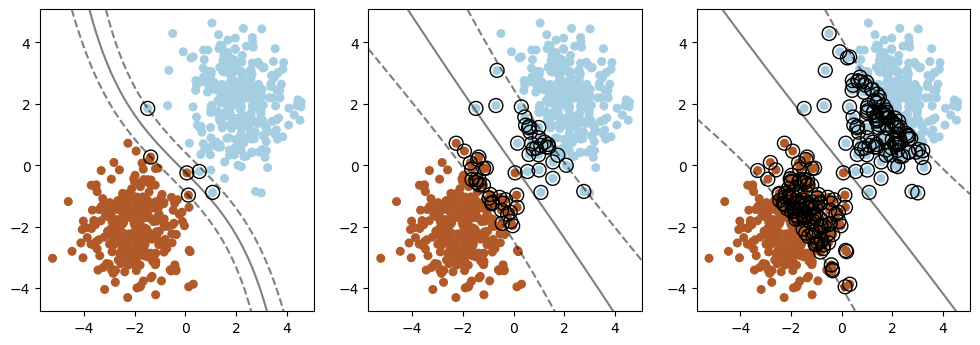

In [10]:
fig, ax = plt.subplots(1,3, dpi = 100, figsize = (12,4))

for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel = "sigmoid", C = C)
    plot_svm_margins(classifier, X, y)